Load the dataset in the program. Define the ANN Model with Keras.
b. Define at least two hidden layers. Specify the ReLU function as activation function for the hidden layer and Sigmoid for the output layer.
c. Compile the model with necessary parameters. Set the number of epochs and batch size and fit the model.
d. Evaluate the performance of the model for different values of epochs and batch sizes.
e. Evaluate model performance using different activation functions Visualize the model using ANN Visualizer.

In [ ]:
import pandas as pd
df = pd.read_csv("ANN_Bank_Marketing.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df = df.dropna(how='all')

In [ ]:
# Convert categorical variables to numeric (one-hot encoding)

'''
get_dummies() → converts categorical (text) columns into numeric form by creating new binary columns (0 or 1)
for each category — this process is called One-Hot Encoding.

drop_first=True → removes one dummy column to avoid "dummy variable trap" (redundant data causing multicollinearity).

In short:
This step transforms all text-based features into numbers so that the ANN model can understand and process them.
'''
df = pd.get_dummies(df, drop_first=True)

In [ ]:


from sklearn.model_selection import train_test_split
X = df.drop('y_yes', axis=1)
y = df['y_yes']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''LabelEncoder changes text labels into numbers so model can understand them.
print(le.classes_) shows all unique class names present in the target column.
 If it prints 2 classes → it's a Binary Classification (like 0 = No, 1 = Yes)'''

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

df['y_yes'] = le.fit_transform(df['y_yes'])

print(le.classes_)

[False  True]


In [ ]:
# Standardize features

'''
   StandardScaler makes all features equal in range (mean=0, std=1).
   This helps the ANN train faster and gives better accuracy.
   Without scaling, large-valued features can dominate smaller ones.
'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
'''
Build ANN (Artificial Neural Network) Model

This is the main part where we design the ANN structure (the brain of the model).

Sequential() => builds the network layer by layer (step-by-step).
Input(shape=(X_train.shape[1],)) => defines how many features go into the model.
Dense(64, activation='relu') => is the first hidden layer with 64 neurons;
                                'relu' (Rectified Linear Unit) helps the model learn complex non-linear patterns.
Dense(32, activation='relu') => is the second hidden layer for deeper feature learning.
Dense(y_train_cat.shape[1], activation='softmax') => is the output layer;
                                                     'softmax' gives class probabilities and is used for multi-class classification.

In short:
Input layer → Hidden layers → Output layer
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define ANN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
'''
This line sets how the model will learn and measure performance.

optimizer = 'adam' → Adaptive optimizer that automatically adjusts learning rate for faster and smoother training.
loss = 'binary_crossentropy' → used when the target has only two classes (binary classification: 0 or 1).
metrics = ['accuracy'] → shows how correctly the model predicts during training and testing.

In short:
This prepares the model for training — defining how it learns (optimizer),
how it measures errors (loss), and what result to display (accuracy).
'''

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model

'''
model.fit() → starts the learning process of the ANN.

X_train, y_train → training data (inputs and actual outputs).
epochs=20 → model will pass through the entire training data 20 times to learn patterns.
batch_size=16 → divides data into batches of 16 samples for each update step, making training efficient.
validation_data=(X_test, y_test) → checks model’s performance on unseen test data after each epoch.
verbose=1 → displays progress of training for each epoch.

In short:
This step teaches the model using training data and monitors how well it performs on test data after every round.
'''

history = model.fit(X_train, y_train,epochs=20, batch_size=16,validation_data=(X_test, y_test),verbose=1)


Epoch 1/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8855 - loss: 0.2740 - val_accuracy: 0.8976 - val_loss: 0.2336
Epoch 2/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9023 - loss: 0.2220 - val_accuracy: 0.8978 - val_loss: 0.2291
Epoch 3/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9028 - loss: 0.2167 - val_accuracy: 0.9014 - val_loss: 0.2265
Epoch 4/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9057 - loss: 0.2132 - val_accuracy: 0.9021 - val_loss: 0.2251
Epoch 5/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9052 - loss: 0.2110 - val_accuracy: 0.9019 - val_loss: 0.2236
Epoch 6/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9063 - loss: 0.2089 - val_accuracy: 0.9017 - val_loss: 0.2212
Epoch 7/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9073 - loss: 0.2077 - val_accuracy: 0.9021 - val_loss: 0.2207
Epoch 8/20
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9086 - loss: 0.2060 

In [ ]:
# Evaluate model

'''
model.evaluate() → tests the trained model using unseen (test) data.

X_test, y_test_cat → input and actual output of test data.
It returns two values:
   loss → how far the model’s predictions are from the actual results.
   acc  → accuracy of the model on test data.

print("Accuracy:", acc) → displays the final accuracy score of the model.

In short:
This step checks how well the model learned and performs on new, unseen data.
'''

loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 0.2153
Accuracy: 0.904235303401947


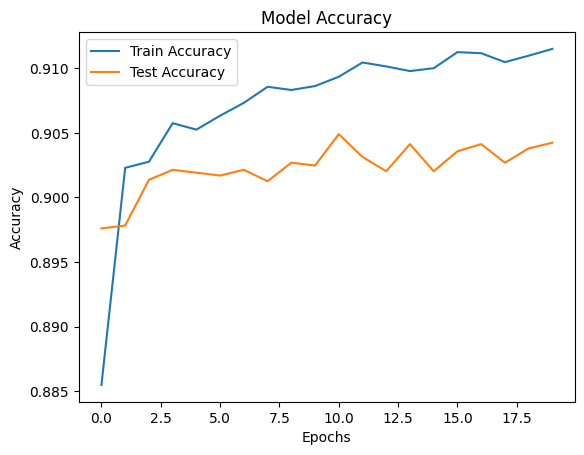

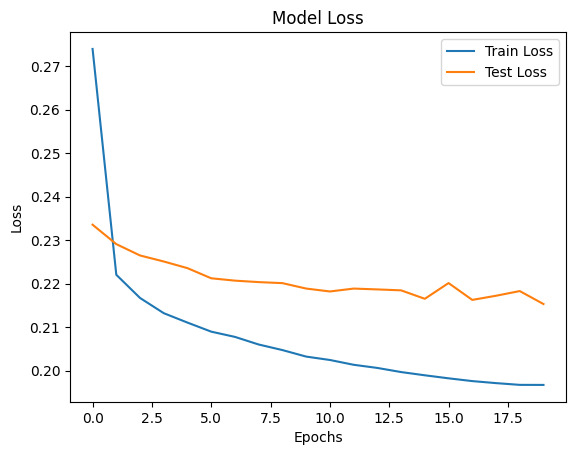

In [ ]:
# Simple Accuracy & Loss Plot

'''
After training, we visualize how the model performed over time.

Accuracy Plot:
   - history.history['accuracy'] → training accuracy at each epoch.
   - history.history['val_accuracy'] → testing accuracy at each epoch.
   Helps check if the model is learning well or overfitting.

Loss Plot:
   - history.history['loss'] → training loss (error).
   - history.history['val_loss'] → validation loss (error on test data).
   Lower loss and stable curves mean better performance.

In short:
These plots show the learning progress of the model — how accuracy improves and loss decreases with epochs.
'''


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
# Example new patient data (same order as your dataset features)
new_patient = [[6, 148, 72, 35, 0, 33.6, 0.627, 50,50,1,23,3,2,4,24,24,45,45435,2,4,3,54,2,5,24,1,1,12,3,4,24,5,23,24,24,34,35,1]]

# scale using same scaler used during training
new_scaled = scaler.transform(new_patient)

# predict
pred = model.predict(new_scaled)

if pred >= 0.5:
    print("Diabetic")
else:
    print("Not Diabetic")


c:\Users\Vaishnavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
Not Diabetic
